In [1]:
##!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

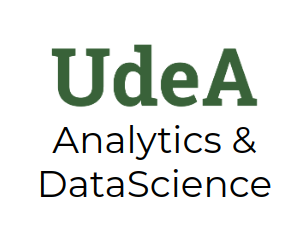

In [2]:
Image("../../docs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Posgrado en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

# Métodos para Reducción de Dimensionalidad

In [3]:
import pandas as pd
import io
import requests
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE # TSNE

*Base de datos: https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis#*

**Abstract**: Features are extracted from motor current. The motor has intact and defective components. This results in 11 different classes with different conditions.

**Data Set Information**:

Features are extracted from electric current drive signals. The drive has intact and defective components. This results in 11 different classes with different conditions. Each condition has been measured several times by 12 different operating conditions, this means by different speeds, load moments and load forces. The current signals are measured with a current probe and an oscilloscope on two phases.

**Attribute Information**:

The Empirical Mode Decomposition (EMD) was used to generate a new database for the generation of features. The first three intrinsic mode functions (IMF) of the two phase currents and their residuals (RES) were used and broken down into sub-sequences. For each of this sub-sequences, the statistical features mean, standard deviation, skewness and kurtosis were calculated.



In [4]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Sensorless_drive_diagnosis.txt"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=' ',
                     decimal = ',')
# Esimportante codificarlo a utf-8
data.head()

,S1_Mean,S1_Std,S1_Skewness,S1_Kurt,S2_Mean,S2_Std,S2_Skewness,S2_Kurt,S3_Mean,S3_Std,...,S10_Kurt,S11_Mean,S11_Std,S11_Skewness,S11_Kurt,S12_Mean,S12_Std,S12_Skewness,S12_Kurt,Label
0,-3.0146e-07,8.2603e-06,-1.1517e-05,-2.3098e-06,-1.4386e-06,-2.1225e-05,0.031718,0.03171,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.9132e-06,-5.2477e-06,3.3421e-06,-6.0561e-06,2.7789e-06,-3.7524e-06,0.030804,0.03081,0.030806,-0.03352,...,-0.59314,7.6252,6.169,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.9517e-06,-3.184e-06,-1.592e-05,-1.2084e-06,-1.5753e-06,1.7394e-05,0.032877,0.03288,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.3226e-06,8.8201e-06,-1.5879e-05,-4.8111e-06,-7.2829e-07,4.1439e-06,0.02941,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.8366e-08,5.6663e-07,-2.5906e-05,-6.4901e-06,-7.9406e-07,1.3491e-05,0.030119,0.030119,0.030145,-0.031393,...,-0.6301,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S1_Mean       58509 non-null  object
 1   S1_Std        58509 non-null  object
 2   S1_Skewness   58509 non-null  object
 3   S1_Kurt       58509 non-null  object
 4   S2_Mean       58509 non-null  object
 5   S2_Std        58509 non-null  object
 6   S2_Skewness   58509 non-null  object
 7   S2_Kurt       58509 non-null  object
 8   S3_Mean       58509 non-null  object
 9   S3_Std        58509 non-null  object
 10  S3_Skewness   58509 non-null  object
 11  S3_Kurt       58509 non-null  object
 12  S4_Mean       58509 non-null  object
 13  S4_Std        58509 non-null  object
 14  S4_Skewness   58509 non-null  object
 15  S4_Kurt       58509 non-null  object
 16  S5_Mean       58509 non-null  object
 17  S5_Std        58509 non-null  object
 18  S5_Skewness   58509 non-null  object
 19  S5_K

In [6]:
X = data.iloc[:, :48] # Características
Y = data['Label'] # Vector de etiquetas

In [7]:
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S1_Mean       58509 non-null  float64
 1   S1_Std        58509 non-null  float64
 2   S1_Skewness   58509 non-null  float64
 3   S1_Kurt       58509 non-null  float64
 4   S2_Mean       58509 non-null  float64
 5   S2_Std        58509 non-null  float64
 6   S2_Skewness   58509 non-null  float64
 7   S2_Kurt       58509 non-null  float64
 8   S3_Mean       58509 non-null  float64
 9   S3_Std        58509 non-null  float64
 10  S3_Skewness   58509 non-null  float64
 11  S3_Kurt       58509 non-null  float64
 12  S4_Mean       58509 non-null  float64
 13  S4_Std        58509 non-null  float64
 14  S4_Skewness   58509 non-null  float64
 15  S4_Kurt       58509 non-null  float64
 16  S5_Mean       58509 non-null  float64
 17  S5_Std        58509 non-null  float64
 18  S5_Skewness   58509 non-nu

In [8]:
X.describe()

,S1_Mean,S1_Std,S1_Skewness,S1_Kurt,S2_Mean,S2_Std,S2_Skewness,S2_Kurt,S3_Mean,S3_Std,...,S10_Skewness,S10_Kurt,S11_Mean,S11_Std,S11_Skewness,S11_Kurt,S12_Mean,S12_Std,S12_Skewness,S12_Kurt
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,8.406765,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,6.897301,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,0.522180,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,4.451300,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,6.566800,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,9.952600,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,265.330000,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100


## ¿Qué es la reducción de dimensionalidad?

La reducción de dimensionalidad es un conjunto de algoritmos que proyecta datos de alta dimensionalidad a datos de baja dimensionalidad, conservando hasta lo posible la fidelidad de información de los datos originales y eliminando información redudante de los datos. Una de las grandes ventajas de la reducción de dimensionalidad es ayudar a crear un modelo que sea capaz de identificar patrones más eficientemente en vez de utilizar los datos originales. 


## Análisis de Componentes Principales (PCA)

**Análisis de Componentes Principales (PCA):** Es un método que expresa un punto (que representa un dato de una base de datos) usando una base ortogonal que representa N vectores linealmente independientes. Lo anterior permite comparar un primer componente principal con respecto a una segunda componente principal y deducir por una correlación entre ellas, cúal componente aporta mayor información. Para llegar a ese punto, PCA calcula una matriz de covarianza que correlaciona la primera y la segunda componente principal. 

Por ejemplo, si tenemos una matriz de covarianza entre las dos componentes princiaples:

$$C = \begin{bmatrix} 8.31 & -0.02 \\ -0.02 & 0.06\end{bmatrix}$$

Si se analiza la matriz, la variación horizontal (filas) es un poco más alta que la variación vertical (columnas). Eso significa que 8.31 es la primera componente que tiene mayor correlación con respecto a los demás componentes, lo cual se puede considerar el conjunto de características de esa primera componente para reducir la dimensionalidad.

In [9]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)
Nombres = X.columns
X_Norm = pd.DataFrame(X_Norm, columns = Nombres)

In [10]:
Num_Componentes = X_Norm.shape[1]

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

# El número de componentes debe ser menor o igual al número de características de los datos.

# Calcular los valores de las componentes principales iterated_power es el número de iteraciones para el método computacional de PCA. 
# Usualmente, es aleatorio el número de iteraciones.
# n_components es el número de componentes principales
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio
# es la semilla usado por el generador de números aleatorios. Sugiero usar la primera opción.
# svd_solver es el método de solución de PCA. Por defecto, se usa svd_solver = "auto" pero pueden seleccionar "full",
# "arpack" o "randomized". Para más opciones de PCA, recomiendo visitar la siguiente url: 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.

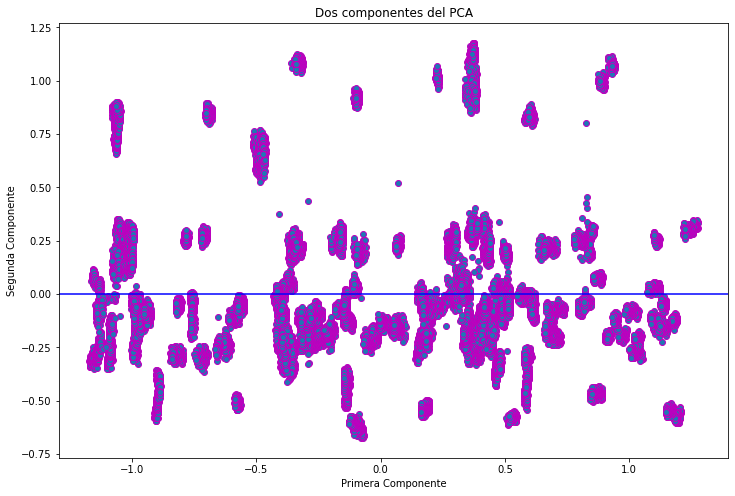

In [11]:
Variables_Principales = pca.fit_transform(X_Norm) 
# Transformarmos las componentes principales a partir de los datos

fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

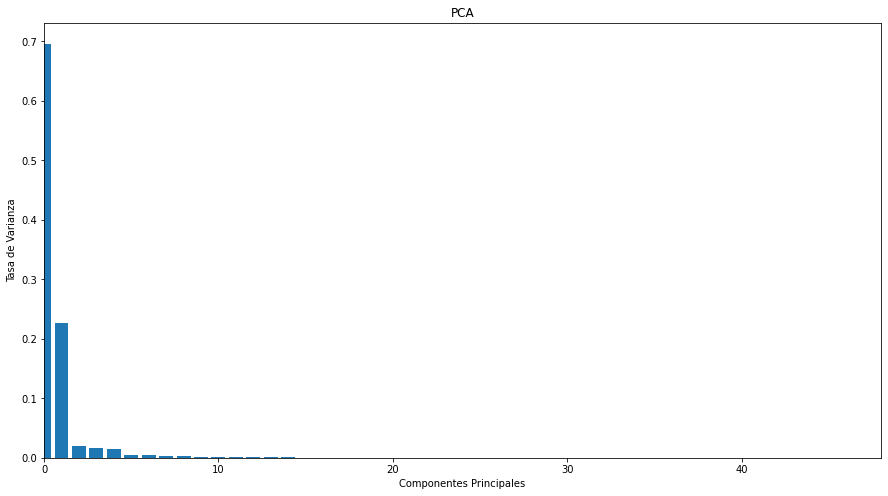

In [12]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

Observen que la primera componente contiene casi el 70% de toda la información de los datos, pero aún falta completar el 30% restante para obtener una apropiada reducción de dimensionalidad. En este caso, es necesario calcular el mínimo número de componentes principales necesarios para representar aproximadamente el 100% de la información original de los datos. Para lograr este requisito, se calcula la **importancia de las componentes principales** para determinar el número mínimo de componentes principales para nuestra base de datos.

In [13]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 3 componentes:  [94.30420965]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [96.01513149]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [97.50598961]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [97.96426645]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [98.36412471]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [98.72987444]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [98.97332973]


Observe que al seleccionar las tres primeras componentes, se está representando el 94% de toda la información y a medida que se aumenta el número de componentes principales, se incrementa el porcentaje de toda la información. En este caso, selecciona las primeras 7 componentes principales.

In [14]:
Componentes_Seleccionadas = 6 
# Recuerde que se toma 0 como la primera componente principal.
# [0:6] es lo mismo que [0, 1, 2, 3, 4, 5, 6], donde 0 es la primera componente, 
# 1 es la segunda componente, 2 es la tercera componente, etc...

Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

X_Norm_PCA = Nuevas_Componentes.fit_transform(X_Norm) 

print('Tamaño de los datos originales con MinMax: ', X_Norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', X_Norm_PCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (58509, 48)
Tamaño de los datos reducidos:  (58509, 7)
Porcentaje de la varianza explicada con las componentes seleccionadas: 97.96%


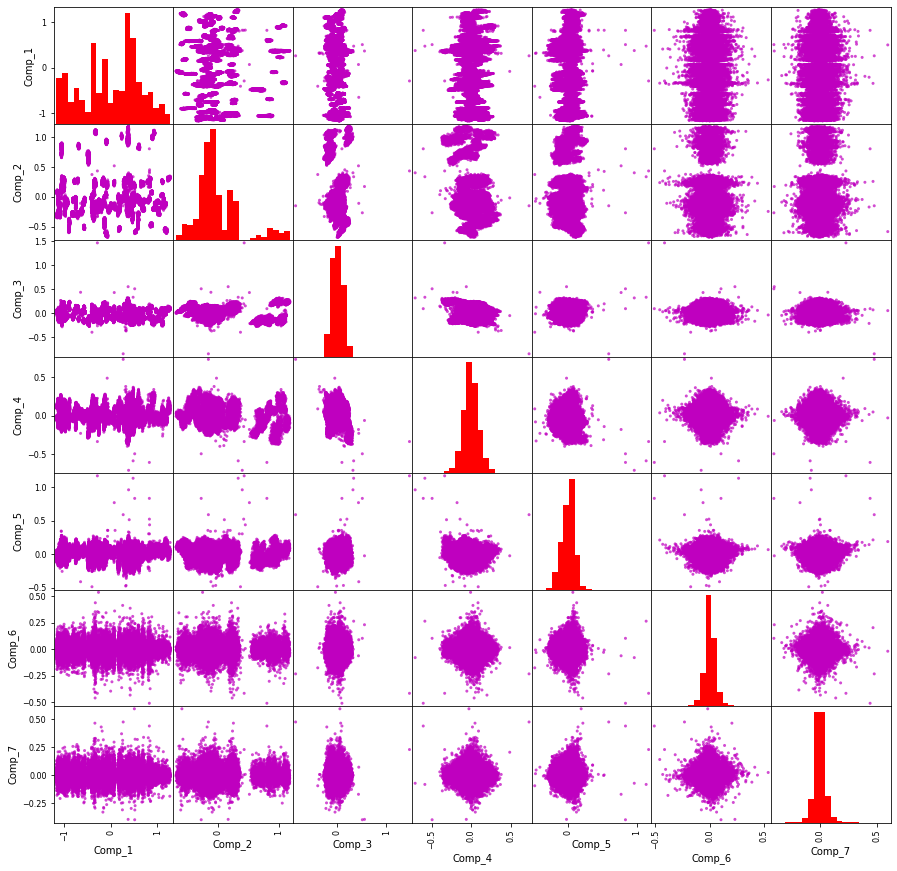

In [15]:
nombres = ["Comp_1", "Comp_2", "Comp_3", "Comp_4", "Comp_5", "Comp_6", "Comp_7"]
X_Norm_PCA = pd.DataFrame(X_Norm_PCA, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_PCA, alpha=0.7, figsize=(15,15),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

Observe que el método PCA transformó los datos originales a una nueva representación de baja dimensionalidad. Considerando ahora el vector de etiquetas, se puede generar una visualización los datos reducidos con el vector de etiquetas de la base de datos.

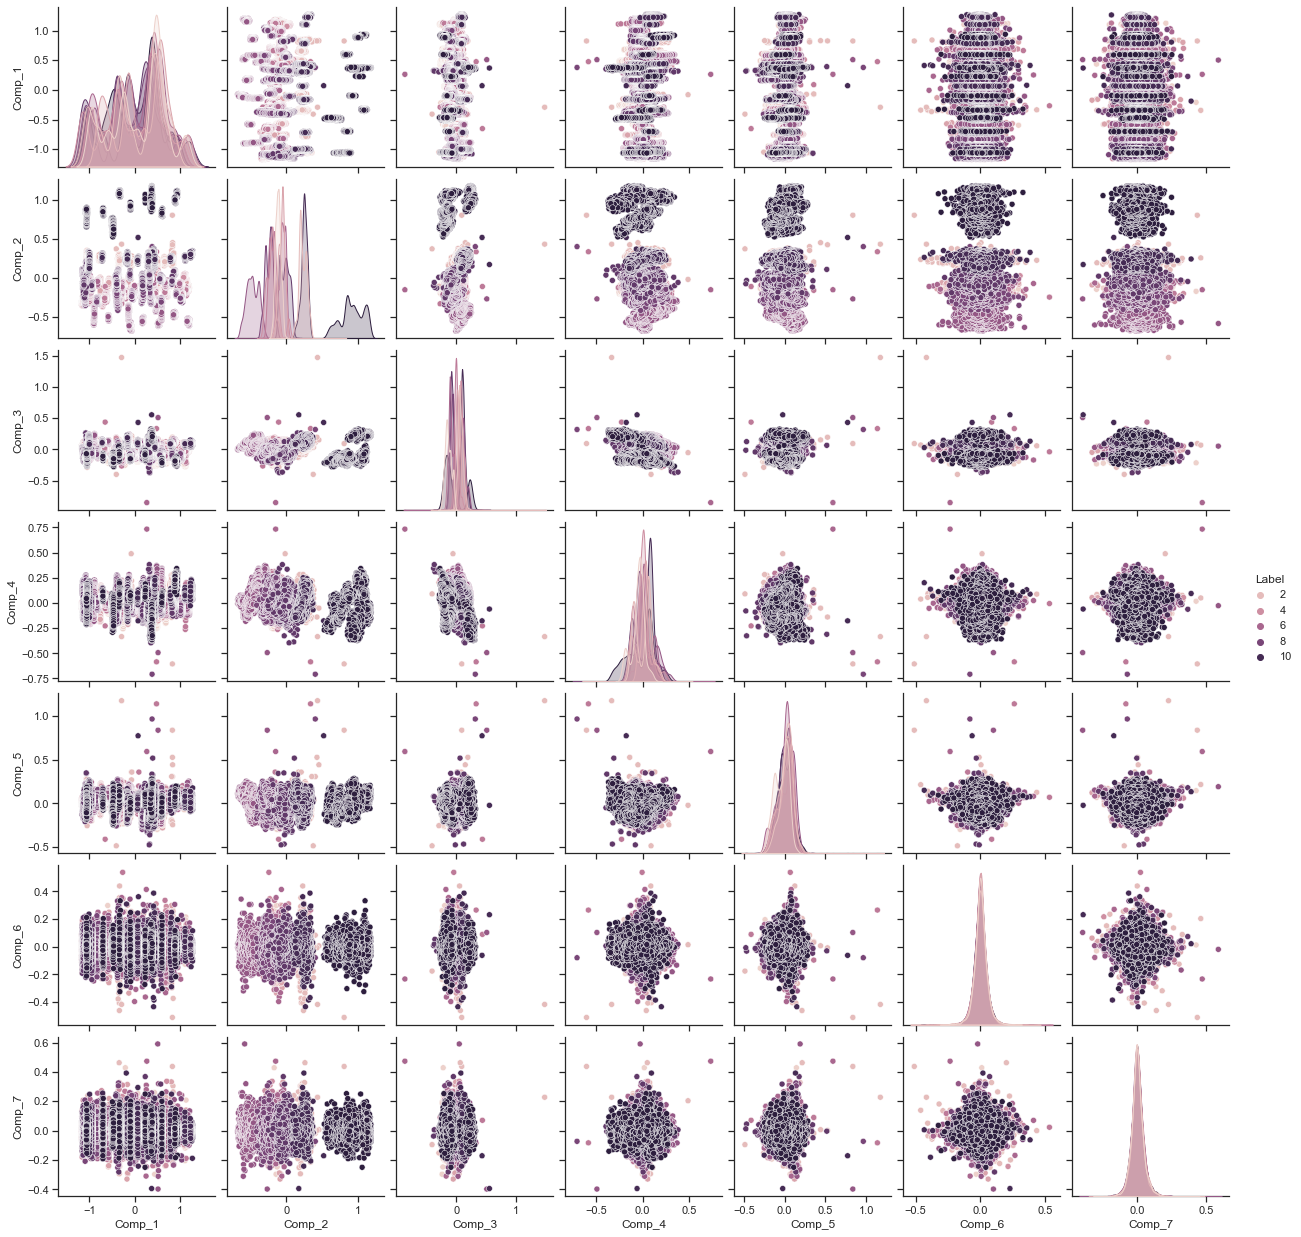

In [16]:
X_Norm_PCA_y_Etiquetas = pd.concat([X_Norm_PCA, Y], axis = 1)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.pairplot(X_Norm_PCA_y_Etiquetas, hue = 'Label', hue_order = ['1','2','3','4','5','6','7','8','9','10','11'])
plt.show()

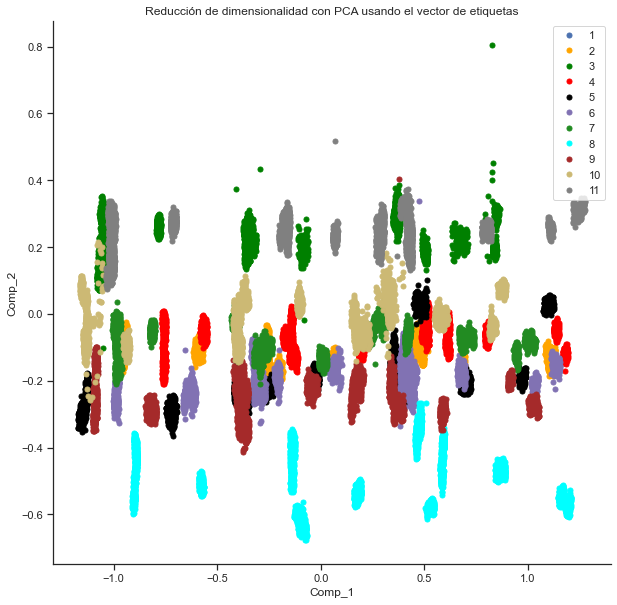

In [17]:
comp_1 = X_Norm_PCA['Comp_1']
comp_2 = X_Norm_PCA['Comp_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
fig = plt.figure(figsize = (10,10))

for j in range(Y.max()):
    plt.plot(comp_1[Y == j], comp_2[Y == j], '.', color = colors[j], markersize = 10,)

plt.xlabel("Comp_1")
plt.ylabel("Comp_2")
plt.title("Reducción de dimensionalidad con PCA usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()

## Kernel PCA

**Kernel PCA (Kernel PCA):** Es un algoritmo que realiza una transformación no lineal de los datos, por medio de una función de similaridad de los puntos de los datos originales con el fin de generar una reducción no lineal de los datos. Tales funciones están basados en el *método o truco kernel* que mapea el espacio de característica de forma implicita tal que la mayoría de los datos representa un número de dimensiones mucho más pequeño que la dimensión original de los datos. De acuerdo a la función de similaridad que se seleccione, se debe configurar los parámetros apropiados para tal función (función de base radial, función polinomial, función lineal, etc,,,).

Veamos un ejemplo de aplicación de este algoritmo de reducción de dimensionalidad.

In [19]:
kpca = KernelPCA(n_components = 5, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.1)
# n_components es el número de componentes principales
# kernel es el método de separación no lineal de los datos. Se puede utilizar diferentes opciones tales como:“linear”, 
# “poly”, “rbf”, “sigmoid”, “cosine”, “precomputed”
# fit_inverse_transform es una transformada inversa de funciones kernel no precomputados, es decir, aprender a encontrar
# por ejemplo la pre-imagen de un punto de los datos. Se recomienda usar fit_inverse_transform = "True" o "False". Si
# se usa kernel = 'rbf', entonces fit_inverse_transform = True
# gamma es un parámetro  que determina los coefientes del Kernel. Solo se usa si kernel= 'rbf', 'poly' o 'sigmoid'.
# Para otros Kernels, no es necesario definir este parámetro.

In [20]:
Variables_Principales_Kernel = kpca.fit_transform(X_Norm_para_Kernel)

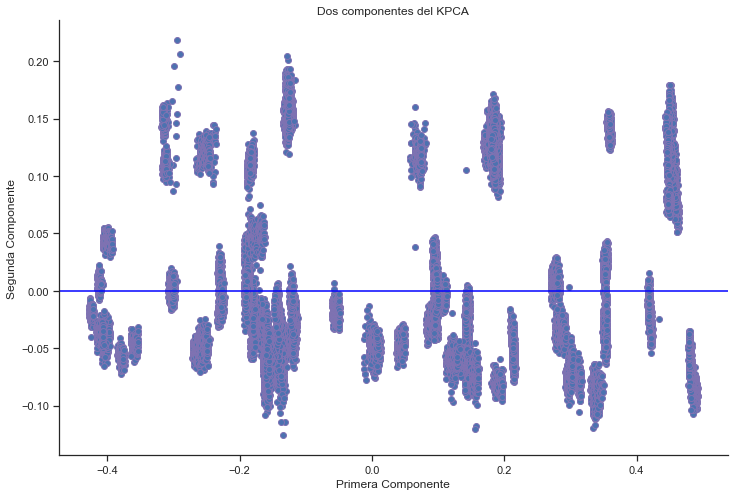

In [21]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales_Kernel[:,0], Variables_Principales_Kernel[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del KPCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

In [22]:
lambdas_kpca = kpca.lambdas_ # Calculamos los eigenvalores o valores propios de la matriz kernel centrado en orden decreciente.
print("Valores propios del método kernel: ", lambdas_kpca)

fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
plt.xlabel('Componentes Principales KPCA')
plt.ylabel('Valores propios o eigenvalores')
plt.title('KPCA')
plt.xlim(0, len(lambdas_kpca))

AttributeError: 'KernelPCA' object has no attribute 'lambdas_'

In [ ]:
NUM_Componentes = 3
kpca_main = KernelPCA(n_components = NUM_Componentes, kernel = 'linear', fit_inverse_transform = True, gamma = 0.1)
Datos_Kernel_RED = kpca_main.fit_transform(X_Norm_para_Kernel)
print('Tamaño de los datos originales con MinMax: ', X_Norm_para_Kernel.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Kernel PCA: ', Datos_Kernel_RED.shape) # Tamaño de los datos reducidos con Kernel PCA

Para verificar si las componentes seleccionadas conservan la mayor cantidad de información de nuestra base de datos, sugiero calcular el error de pérdida de información que les construí para el Kernel PCA

In [ ]:
Datos_inversa = kpca_main.inverse_transform(Datos_Kernel_RED) 
# Generamos la transformada inversa del KPCA para obtener los datos reconstruidos
print('Tamaño de los datos con transformada inversa: ', Datos_inversa.shape)

In [ ]:
def error_kernelpca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
X_Norm_para_Kernel_DF = pd.DataFrame(data = np.array(X_Norm_para_Kernel))
Datos_inversa_DF = pd.DataFrame(data = np.array(Datos_inversa))
Error = error_kernelpca(X_Norm_para_Kernel_DF, Datos_inversa_DF)

print('Error promedio: {:.5f}'.format(np.mean(Error)))

In [ ]:
nombres = ["Comp_1", "Comp_2", "Comp_3"]
X_Norm_KPCA = pd.DataFrame(Datos_Kernel_RED, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_KPCA, alpha=0.7, figsize=(15,15),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [ ]:
comp_1 = X_Norm_KPCA['Comp_1']
comp_2 = X_Norm_KPCA['Comp_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
fig = plt.figure(figsize = (10,10))

Y_Kernel = Y[0:25001]

for j in range(Y_Kernel.max()):
    plt.plot(comp_1[Y_Kernel == j], comp_2[Y_Kernel == j], '.', color = colors[j], markersize = 10)

plt.xlabel("Comp_1")
plt.ylabel("Comp_2")
plt.title("Reducción de dimensionalidad con Kernekl PCA usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()

## Sparse PCA

**PCA Esparcido:** Es una versión mejorada del algoritmo PCA que retiene algunos grados de esparcimiento, es decir, aquellos datos que genera una mayor dispersión con respecto a los demás datos. Por lo general, el PCA esparcido se controla por medio de un hiperparámetro llamado *alpha*, que permite generar transformaciones lineales de los datos basado en la cantidad de esparcimiento de los datos que se desea controlar. A diferencial del PCA clásico, el PCA esparcido realiza una reducción de dimensionliada más fino, lo cual, el consumo de memoría RAM es mayor con respecto al PCA clásico.


In [ ]:
Num_Componentes = X_Norm_para_Kernel.shape[1]

spca = SparsePCA(n_components = Num_Componentes, alpha = 0.1, ridge_alpha = 0.01, random_state = 17, max_iter = 1000, tol = 1e-3)
# n_components es el número de componentes principales
# alpha es un parámetro que controla que tan esparcido quiere la separación de los datos. Entre más grandes sea este parámetro,
# genera más componentes de como se separa los datos.  Se recomienda alpha = 0.1
# ridge_alpha es un parámetro de control fino del PCA esparcido.
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio

In [ ]:
Variables_Principales_Sparse = spca.fit_transform(X_Norm_para_Kernel)

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales_Sparse[:,0], Variables_Principales_Sparse[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del Sparse PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

In [ ]:
promedio = np.mean(spca.components_ == 0)
print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio))

Ya que el valor promedio de esparcimiento es cercano a 1.0, se esta perdiendo solamente el 3.7 % de la información, considerando que el número de componentes principales es igual al número de características o variables de la base de datos. Si seleccionamos menos componentes principales, podemos realizar una reducción de dimensionalidad sin sacrificar tanta información. 

In [ ]:
spca_2 = SparsePCA(n_components = 15, alpha = 0.5, ridge_alpha = 0.05, random_state = 17, max_iter = 1000, tol = 1e-3)
Datos_SPCA_2 = spca_2.fit_transform(X_Norm_para_Kernel)
promedio_2 = np.mean(spca_2.components_ == 0)
print('Valor promedio de esparcimiento con un número de componentes definida por usuario = {:.3f}'.format(promedio_2))

In [ ]:
print('Tamaño de los datos originales con MinMax: ', X_Norm_para_Kernel.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Sparse PCA: ', Datos_SPCA_2.shape) # Tamaño de los datos reducidos con Sparse PCA

In [ ]:
nombres = ["Comp_1", "Comp_2", "Comp_3", "Comp_4", "Comp_5", "Comp_6", "Comp_7", "Comp_8", "Comp_9",
           "Comp_10", "Comp_11", "Comp_12", "Comp_13", "Comp_14", "Comp_15"]
X_Norm_SPCA = pd.DataFrame(Datos_SPCA_2, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_SPCA, alpha=0.7, figsize=(15,15),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [ ]:
comp_1 = X_Norm_SPCA['Comp_1']
comp_2 = X_Norm_SPCA['Comp_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
fig = plt.figure(figsize = (10,10))

Y_Kernel = Y[0:25001]

for j in range(Y_Kernel.max()):
    plt.plot(comp_1[Y_Kernel == j], comp_2[Y_Kernel == j], '.', color = colors[j], markersize = 10)

plt.xlabel("Comp_1")
plt.ylabel("Comp_2")
plt.title("Reducción de dimensionalidad con Sparse PCA usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()

In [ ]:
X_Reconstruido = safe_sparse_dot(X_Norm_SPCA, spca_2.components_) # Versión del Sparse PCA para calcular la transformada inversa
                                                                  # y obtener los datos reconstruidos.

In [ ]:
def error_spca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
X_Norm_para_Kernel_DF = pd.DataFrame(data = np.array(X_Norm_para_Kernel))
X_Reconstruido_DF = pd.DataFrame(data = np.array(X_Reconstruido))
Error = error_spca(X_Norm_para_Kernel_DF, X_Reconstruido_DF)

print('Error promedio: {:.5f}'.format(np.mean(Error)))

## Mini Batch Sparse PCA

**Mini Batch Sparse PCA:** Es una mejora del algoritmo Sparse PCA para preprocesar los datos por lotes o batch de datos, lo cual, en vez de analizar todas las muestras o filas de la base de datos, se analiza por secciones o partes de la base de datos. Esta estrategía permite reducir el tiempo de cómputo del algoritmo.

In [ ]:
Num_Componentes = X_Norm.shape[1]

minispca = MiniBatchSparsePCA(n_components = Num_Componentes, alpha = 0.1, ridge_alpha = 0.01, 
                          random_state = 17, n_iter = 1000, batch_size = Num_Componentes,
                          n_jobs = 2)
# batch size debe ser igual o mayor al número de características o variables de la base de datos
# n_components es el número de componentes principales
# alpha es un parámetro que controla que tan esparcido quiere la separación de los datos. Entre más grandes sea este parámetro,
# genera más componentes de como se separa los datos. Se recomienda alpha = 0.1
# ridge_alpha es un parámetro de control fino del PCA esparcido.
# random_state es la semilla de un número aleatorio. Si random_state = 'None', significa que el generador de números
# aleatorios es una muestra de un estado aleatorio usado por np.random. Si random_state = 'Int', entonces el estado aleatorio

In [ ]:
Variables_Principales_MiniSparse = minispca.fit_transform(X_Norm)

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales_MiniSparse[:,0], Variables_Principales_MiniSparse[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del MiniSparse PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

In [ ]:
promedio = np.mean(minispca.components_ == 0)
print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio))

In [ ]:
minispca_2 = MiniBatchSparsePCA(n_components = 25, alpha = 0.1, ridge_alpha = 0.01, 
                          random_state = 17, n_iter = 1000, batch_size = Num_Componentes,
                          n_jobs = 2)
Datos_mini_SPCA_2 = minispca_2.fit_transform(X_Norm)
promedio_2 = np.mean(minispca_2.components_ == 0)
print('Valor promedio de esparcimiento con un número de componentes definida por usuario = {:.3f}'.format(promedio_2))

In [ ]:
print('Tamaño de los datos originales con MinMax: ', X_Norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Mini Batch Sparse PCA: ', Datos_mini_SPCA_2.shape) 
# Tamaño de los datos reducidos con Mini Batch Sparse PCA

In [ ]:
nombres = ["Comp_1", "Comp_2", "Comp_3", "Comp_4", "Comp_5", "Comp_6", "Comp_7", "Comp_8", "Comp_9",
           "Comp_10", "Comp_11", "Comp_12", "Comp_13", "Comp_14", "Comp_15", "Comp_16", "Comp_17",
           "Comp_18", "Comp_19", "Comp_20", "Comp_21", "Comp_22", "Comp_23", "Comp_24", "Comp_25"]
X_Norm_mini_SPCA = pd.DataFrame(Datos_mini_SPCA_2, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_mini_SPCA, alpha=0.7, figsize=(20,20),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [ ]:
comp_1 = X_Norm_mini_SPCA['Comp_1']
comp_2 = X_Norm_mini_SPCA['Comp_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
fig = plt.figure(figsize = (10,10))

for j in range(Y.max()):
    plt.plot(comp_1[Y == j], comp_2[Y == j], '.', color = colors[j], markersize = 10)

plt.xlabel("Comp_1")
plt.ylabel("Comp_2")
plt.title("Reducción de dimensionalidad con Mini Batch Sparse PCA usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()

In [ ]:
X_Reconstruido = safe_sparse_dot(X_Norm_mini_SPCA, minispca_2.components_) # Versión del Sparse PCA para calcular la transformada inversa
                                                                           # y obtener los datos reconstruidos.
X_Reconstruido_DF = pd.DataFrame(data = np.array(X_Reconstruido))
Error = error_spca(X_Norm, X_Reconstruido_DF)

print('Error promedio: {:.5f}'.format(np.mean(Error)))                                                                  

## PCA Incremental

**PCA Incremental:** Es un algoritmo mejorado del PCA para reducción de dimensionalidad cuando la base de datos es muy grande. Por lo general, el PCA incremental establece pequeños lotes o batches de datos, permitiendo ejecutar el algoritmo PCA por cada lote y así, se evita un consumo excesivo de memoría RAM. El tamaño del batch se establece en bits, donde el valor típico es 32.

In [ ]:
Num_Componentes = X_Norm.shape[1]
incPCA = IncrementalPCA(n_components = Num_Componentes, whiten = True, batch_size = Num_Componentes)
Variables_Principales_IPCA = incPCA.fit_transform(X_Norm) 

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales_IPCA[:,0], Variables_Principales_IPCA[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del IPCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

In [ ]:
Valores_Singulares_incPCA = incPCA.singular_values_

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Valores_Singulares_incPCA)), Valores_Singulares_incPCA)
plt.xlabel('Componentes Principales')
plt.ylabel('Valores Singulares')
plt.title('Valores Singulares del PCA Incremental')
plt.xlim(0, len(Valores_Singulares_incPCA))
plt.show()

In [ ]:
Varianza_incPCA = incPCA.explained_variance_ratio_
Importancia_Componentes_incPCA = pd.DataFrame(data = Varianza_incPCA)
Importancia_Componentes_incPCA = Importancia_Componentes_incPCA.T
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes_incPCA.loc[:,0:7].sum(axis = 1).values))

In [ ]:
incPCA = IncrementalPCA(n_components = 7, whiten = True, batch_size = 32) # Seleccionamos las primeras 7 componentes principales
Datos_Reducidos_IPCA = incPCA.fit_transform(X_Norm) 

print('Tamaño de los datos originales con MinMax: ', X_Norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', Datos_Reducidos_IPCA.shape)  # Tamaño de los datos reducidos

In [ ]:
nombres = ["Comp_1", "Comp_2", "Comp_3", "Comp_4", "Comp_5", "Comp_6", "Comp_7"]
X_Norm_incPCA = pd.DataFrame(Datos_Reducidos_IPCA, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_incPCA, alpha=0.7, figsize=(15,15),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [ ]:
comp_1 = X_Norm_incPCA['Comp_1']
comp_2 = X_Norm_incPCA['Comp_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
fig = plt.figure(figsize = (10,10))

for j in range(Y.max()):
    plt.plot(comp_1[Y == j], comp_2[Y == j], '.', color = colors[j], markersize = 10)

plt.xlabel("Comp_1")
plt.ylabel("Comp_2")
plt.title("Reducción de dimensionalidad con PCA Icremental usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()

In [ ]:
def error_incpca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
X_Reconstruido_incPCA = incPCA.inverse_transform(X_Norm_incPCA)
X_Reconstruido_incPCA_DF = pd.DataFrame(data = np.array(X_Reconstruido_incPCA))
Error = error_incpca(X_Norm, X_Reconstruido_incPCA_DF)

print('Error promedio: {:.5f}'.format(np.mean(Error)))

## Análisis de Componentes Independientes (ICA)

Cuando se realiza una reducción de dimensionalidad con el clásico algoritmo PCA, no considera la posibilidad de la independencia existente entre las características de una base de datos. Usando el algoritmo de Análisis de Componentes Independientes, se puede obtener un conjunto de componentes independientes que permite separar los datos de una forma más eficiente que el PCA. No obstante, **a nivel práctico, este algoritmo se recomienda para tareas de procesamiento de señales obtenidos por sensores o en el sector financiero**, cuando se desea separar los datos en conjuntos representativos para realizar un análisis independiente. 



In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Espectros.csv"
download = requests.get(url).content
data_espectros = pd.read_csv(io.StringIO(download.decode('utf-8')), sep = '\t')
# Esimportante codificarlo a utf-8
display(data_espectros.head(20))

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(12,8))

plt.plot(np.arange(0,data_espectros.shape[0]), data_espectros['Espectro 1'], 'b', linewidth = 2) # Se muestra la función de densidad de probabilidad estimado por densidad kernel
plt.xlabel("Muestras o Filas")
plt.ylabel("Potencia [dBm]")
plt.show()

In [ ]:
data_espectros_mW = (10**(data_espectros/10)) # dBm a mW

fig = plt.figure(figsize=(12,8))

plt.plot(np.arange(0,data_espectros_mW.shape[0]), data_espectros_mW['Espectro 1'], 'm', linewidth = 2) # Se muestra la función de densidad de probabilidad estimado por densidad kernel
plt.xlabel("Muestras o Filas")
plt.ylabel("Potencia [mW]")
plt.show()

In [ ]:
def error_ica(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
componentes = np.arange(2,data_espectros.shape[1],1)
Error_ICA = []

for _,n in enumerate(componentes):
  Modelo_ICA = FastICA(n_components = n, fun = 'logcosh', fun_args = {'alpha': 1},max_iter = 1000)
  data_espectros_mW_reducido = Modelo_ICA.fit_transform(data_espectros_mW)
  datos_reconstruidos = Modelo_ICA.inverse_transform(data_espectros_mW_reducido)
  X_PCA = pd.DataFrame(data = np.array(data_espectros_mW))
  Datos_inversa_PCA = pd.DataFrame(data = np.array(datos_reconstruidos))
  Error = error_ica(X_PCA, Datos_inversa_PCA)
  Error_ICA.append(Error.sum()/Datos_inversa_PCA.shape[0])

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(2, 2 + len(np.asarray(Error_ICA))), Error_ICA)
plt.xlabel('Componentes Principales')
plt.ylabel('Error ICA')
plt.title('RMSE ICA')
plt.xlim(1, 2 + len(Error_ICA))
plt.show()

In [ ]:
pos = np.where(np.asarray(Error_ICA) < 0.015) # 0.015 es un umbral de decisión
n_optimo_componentes = np.array(pos) + 2
Errores = pd.DataFrame(Error_ICA).loc[pos]
Tabla = np.vstack([n_optimo_componentes, Errores.values.T]).T
Tabla = pd.DataFrame(Tabla, columns = ["Componentes", "Error ICA"])
display(Tabla)

In [ ]:
Modelo_ICA = FastICA(n_components = 2, fun = 'logcosh', fun_args = {'alpha': 1},max_iter = 1000)
data_espectros_mW_reducido = Modelo_ICA.fit_transform(data_espectros_mW)
print("Tamaño de los Datos Originales = ", data_espectros_mW.shape)
print("Tamaño de los Datos Reducidos = ", data_espectros_mW_reducido.shape)

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(data_espectros_mW_reducido[:,0], data_espectros_mW_reducido[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del ICA') # Titulo de la gráfica
plt.xlabel('Primera Componente Independiente') # Etiqueta del eje x
plt.ylabel('Segunda Componente Independiente') # Etiqueta del eje y
plt.show() # Mostrar figura

## Método de Proyecciones Aleatorias

Este método consiste en una reducción lineal de la dimensionalidad de los datos basado en el **Lema Jhonson - Lindenstrauss**. Dicho Lema afirma que los puntos en un espacio de alta dimensionalidad de los datos pueden llegar a ser embebidos dentro un espacio de muy baja dimensionalidad siempre y cuando las distancias entre los puntos más cercanos se mantengan fijos. Lo anterior quiere decir que al transformar los datos de alta dimensionalidad a baja dimensionalidad, se debe conservar la estructura relevante del conjunto de características originales de la base de datos. De esta forma, la transformada inversa generará un conjunto de datos con el menor margen de erro posible.

Usualmente, hay dos métodos de proyección aleatoria:

1.   **Proyección Aleatoria Gaussiana:** Es un tipo de proyección basada en una función kernel Gaussiana, el cual genera un conjunto de datos embebidos o reducidos mediante una proyección generada por la mencionada función. Para controlar la proyección y garantizar la calidad del embebimiento de los datos, se varía un parámetro de control llamado *eps*, el cual, si *eps* es pequeño, la reducción de dimensionalidad será mínima, es decir, se genera un número alto de componentes. A medida que aumenta dicho parámetro, el número de componentes se va reduciendo pero se debe analizar el error cuadrático medio entre los datos originales y los datos reconstruidos desde los datos embebidos.
2.   **Proyección Aleatoria Esparcido:** Es un tipo de proyección que genera un conjunto de datos embebidos de acuerdo al grado de esparcimiento de los datos. A diferencia del método anterior, este tipo de proyección tiene un costo computacional menor.



Ahora, vamos a mirar como se aplica este método con nuestro conjunto de datos:

In [ ]:
Num_muestras = X_Norm.shape[0]
eps = [0.99, 0.97, 0.95, 0.9, 0.7, 0.5, 0.1, 0.01]
Numero_dimensiones_minimos = johnson_lindenstrauss_min_dim(n_samples = Num_muestras, eps = eps)
Tabla = np.vstack([eps, Numero_dimensiones_minimos])
Tabla = pd.DataFrame(Tabla, index = ["eps", "Dimensiones"])
display(Tabla)

In [ ]:
GNP = GaussianRandomProjection(n_components = 20, eps = 0.5)
datos_reducidos_GNP = GNP.fit_transform(X_Norm)

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.hist(GNP.components_.flatten(), bins = 'fd')
plt.title('Histograma de la matriz de transformación GNP')
plt.ylabel("Componentes")
plt.show()

In [ ]:
SRP = SparseRandomProjection(n_components = 20, density = 'auto', eps = 0.9)
datos_reducidos_SRP = SRP.fit_transform(X_Norm)

In [ ]:
datos_reducidos_SRP

## TSNE

t-SNE o embebimiento de vecindad estocástica con distribución t-student es un método de reducción de dimensionalidad no lineal donde los datos son modelados por similaridad y disimilaridad entre los datos. Usualmente, el método construye dos distribuciones de probabilidad, la primera que representa los datos de alta dimensionalidad y la segunda que representa los datos de baja dimensionalidad. Esta estrategia permite identificar los datos con mayor probabilidad de ser similares y cuales datos tienen una baja probabilidad de ser similares. Debido a este tipo de cálculo, se debe considerar una función de optimización llamada **la divergencia de Kullback-Leibler o KL**, que permite minimizar el error cuando se analiza las dos funciones de probabilidad mencionadas.

Es importante tener precauciones cuando se utiliza t-SNE puesto que al ejecutar el algoritmo, se genera diferentes resultados de la reducción de dimensionalidad puesto que el algoritmo se ejecuta con una inicialización aleatoria (además, la función de optimización del algoritmo t-SNE es no-convexa)

In [ ]:
tsne = TSNE(n_components = 3, learning_rate = 300, perplexity = 30, method = 'barnes_hut', 
            early_exaggeration = 12, init = 'random', random_state = 0)
# n_components es el número de componentes principales
# learning_rate es la tasa de aprendizaje con rango entre [10.0, 1000.0]. Se recomienda usar entre 200 y 300
# method es el método de aproximación que realiza tsne. otro método es ’exact’ pero se recomienda para datos con un número de 
# muestras inferior a 5000.
# early_exaggeration controla la reducción de dimensionalidad cuando se pasa a un espacio de embebimiento de los datos.
# perplexity esta relacionado con el número de vecinos más cercanos pero es un valor para definir cuantos vecinos se considera
# en el algoritmo tsne

In [ ]:
Datos_Reducidos_TSNE = tsne.fit_transform(X_Norm) # Se puede demorar 20 a 30 minutos
print(X_Norm.shape) # Tamaño de los datos originales
print(Datos_Reducidos_TSNE.shape) # Tamaño de los datos reducidos

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Datos_Reducidos_TSNE[:,0], Datos_Reducidos_TSNE[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del TSNE') # Titulo de la gráfica
plt.xlabel('$z_1$') # Etiqueta del eje x
plt.ylabel('$z_2$') # Etiqueta del eje y
plt.show() # Mostrar figura

In [ ]:
nombres = ["z_1", "z_2", "z_3"]
X_Norm_tsne = pd.DataFrame(Datos_Reducidos_TSNE, columns = nombres)
pd.plotting.scatter_matrix(X_Norm_tsne, alpha=0.7, figsize=(15,15),
                           color = 'm', hist_kwds = {'bins':20, 'color':'red'}) # Grafica de dispersión e histogramas
plt.show()

In [ ]:
comp_1 = X_Norm_tsne['z_1']
comp_2 = X_Norm_tsne['z_2']

colors = ["b", "orange", "green", "red", "black", "m", "ForestGreen", "cyan", "brown", "y", "grey"]
clases = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]

fig = plt.figure(figsize = (10,10))

for j in range(Y.max()):
    plt.plot(comp_1[Y == j], comp_2[Y == j], '.', color = colors[j], markersize = 10)

plt.xlabel("z_1")
plt.ylabel("z_2")
plt.title("Reducción de dimensionalidad con TSNE usando el vector de etiquetas")
plt.legend(clases, loc='upper right')
plt.show()